# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [249]:
# Import your libraries:

import pandas as pd
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np
import matplotlib.pyplot as plt

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [250]:
# Your code here:

diabetes = load_diabetes()


Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [251]:
# Your code here:

diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [252]:
# Your code here:

desc = diabetes["DESCR"]

What are the variables in this dataset according to the description? List them in the markdown cell below

#### Enter your answer here:

- age:     age in years
- sex:
- bmi:     body mass index
- bp:      average blood pressure
- s1:      tc, T-Cells (a type of white blood cells)
- s2:      ldl, low-density lipoproteins
- s3:      hdl, high-density lipoproteins
- s4:      tch, thyroid stimulating hormone
- s5:      ltg, lamotrigine
- s6:      glu, blood sugar level

Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [253]:
# Your code here:

# Cargo X e y como los datos 

X,y = load_diabetes(return_X_y=True)

cols = load_diabetes()["feature_names"]



In [254]:
# Hago el dataframe y le añado la columna y con el valor de y

df = pd.DataFrame(X, columns=cols)

df["y"] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [255]:
df.shape

(442, 11)

# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

In [188]:
# Your code here:

from sklearn.linear_model import LinearRegression
import seaborn as sns


Initialize the model in the variable `diabetes_model`

In [189]:
# Your code here:

# Hago la regresión lineal y ajusto (fit) a nuestro conjunto de entradas 'X' y salidas ‘y’.

diabetes_model = LinearRegression().fit(X, y)

diabetes_model

LinearRegression()

In the cell below, fit the model and print the intercept and coefficients of the model. 

In [190]:
# Your code here:

# Precisión media de las predicciones

reg.score(X, y)

0.5177494254132934

In [191]:
reg.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [192]:
# Intercept indica el valor de Y cuando el valor de X es 0. 
# La intersección de regresión se utiliza junto con la pendiente de regresión lineal para crear
# la línea de regresión lineal. La intersección de regresión lineal junto con la pendiente
# crea la línea de regresión.


reg.intercept_

152.1334841628965

In [193]:
# Obtengo las correlaciones de todas las variables

corr = df.corr()

corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


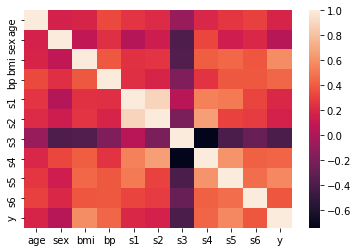

In [194]:
sns.heatmap(corr)

# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Your result should look similar to this:

![ols](../ols-results.png)

In [257]:
# Your code here:

import statsmodels.api as sm
from scipy import stats


# Generate artificial data (2 regressors + constant)
# In [9]: nobs = 100

# In [10]: X = np.random.random((nobs, 2))

# In [11]: X = sm.add_constant(X)

# In [12]: beta = [1, .1, .5]

# In [13]: e = np.random.random(nobs)

# In [14]: y = np.dot(X, beta) + e

# # Fit regression model
# In [15]: results = sm.OLS(y, X).fit()

# # Inspect the results
# In [16]: print(results.summary())



# Challenge 2 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [195]:
# Your code here:

auto = pd.read_csv('../auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [196]:
# Your code here:

auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [197]:
# Your code here:

auto.dtypes

# Todas las columnas siguen los patrones marcados

mpg             float64
cylinders         int64
displacement    float64
horse_power     float64
weight            int64
acceleration    float64
model_year        int64
car_name         object
dtype: object

What is the newest model year and the oldest model year?

In [198]:
# Your code here:

print(auto["model_year"].max())

print(auto["model_year"].min())


82
70


Check the dataset for missing values and remove all rows containing at least one missing value.

In [199]:
# Your code here:

# Miro la cantidad de nulos que hay por cada columna

auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horse_power     6
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

In [206]:
auto = auto.dropna()

In [207]:
# Compruebo que he borrado los datos

auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horse_power     0
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [208]:
# Your code here:

auto["cylinders"].value_counts()

a = auto["cylinders"].max()

print(f"Hay un máximo de {a} cilindros")

Hay un máximo de 8 cilindros


We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [232]:
# Import the necessary function

from sklearn.model_selection import train_test_split

auto1 = auto.drop(columns='car_name')

auto1

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [233]:
# Your code here:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80)


Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [228]:
# Your code here:

y = auto1["mpg"]
X = auto1.drop(columns="mpg")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)


Next, fit the model in the cell below.

In [235]:
# Your code here:

lr1 = LinearRegression()
lr1.fit(X_train, y_train)

lr1.intercept_

-3.638250132133031

In [234]:
lr1.coef_

array([ 0.05361287,  0.0025959 , -0.00388485, -0.0067928 ,  0.05142026,
        0.79351149])

# Challenge 3 - Evaluate the Model

The r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [258]:
# Import the necessary function:

from sklearn.metrics import r2_score, mean_squared_error


In [259]:
# Your code here:

y_pred = lr1.predict(X_test)

r2_score(y_test,y_pred)

if r2_score(y_test,y_pred) > 0.6:
    print("La relación es alta")
    
elif r2_score(y_test,y_pred) < 0.4:
    print("La relación es baja")

r2_score(y_test,y_pred)


La relación es alta


0.7600939541647915

#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_test` data and the predicted `y_test_pred`.

In [226]:
## Objetivo

# Utilizar los datos de prueba
# Comprabar que no se sobreajusten, para poder así generalizarlo de cara a llegada de nuevos datos.

## Pasos

# y_test_pred = valores predichos para los datos de entrenamiento
# Calcular r2 para los datos de la prueba, comparando los datos observados de la prueba y y la predicción de y_prueba_pred.

y_test_pred = lr.predict(X_train)

r2_score(y_train, y_test_pred)

r2_score


############# NO ENTIENDO PORQUE NO ME SALE #################### Hay una diferencia entre los shape entiendo...

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 6)

# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [236]:
# Your code here:

# 1. Crear un modelo más simple
# 2. Aumentar el tamaño de la muestra del tren.

# Comencemos con la opción más fácil y aumentemos el tamaño de la muestra de train sample al 90% de los datos. 
# Cree un nuevo test train split y nombre los nuevos predictores y variables de respuesta X_train09, X_test09, y_train09, y_test09



X_train09, X_test09, y_train09, y_test09 = train_test_split(X, y, test_size=0.90)


Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [240]:
# Your code here:

auto_model09 = LinearRegression()

auto_model09.fit(X_train09, y_train09)

LinearRegression()

In [241]:
auto_model09.intercept_

7.894055331265994

In [242]:
auto_model09.coef_

array([-0.3705385 ,  0.0126957 , -0.01517748, -0.00728258,  0.45980717,
        0.40705837])

Compute the predicted values and r squared score for our new model and new sample data.

In [248]:
# Your code here:

y_pred09 = auto_model09.predict(X_test09)

r2_score(y_test09,y_pred09)

if r2_score(y_test09,y_pred09) > 0.6:
    print("La relación es alta")
    
elif r2_score(y_test09,y_pred09) < 0.4:
    print("La relación es baja")

r2_score(y_test09,y_pred09)

La relación es alta


0.7645257636014671

Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [199]:
# Your code here:


# Los más pequeños son los test. Con el X_test09  hacer un predict y luego compararlo con el y_test09
# Haciendo un r2_score
# Eso te va a dar el r2_score entre las predicciones del modelo que has hecho y los datos reales

# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [200]:
# Your code here:



Fit the model and print the ranking

In [201]:
# Your code here:



Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [202]:
# Your code here:



Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [203]:
# Your code here: 

